# Finance Data Project

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

# importing libraries

In [183]:
import pandas as pd 
import os
import pandas_datareader
import streamlit as st 
import pandas_datareader.data as web
import yfinance as yf 
import datetime as dt 
import numpy as np
from pandas_datareader import data, wb
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


In [184]:
# Set Seaborn style
#sns.set(style='darkgrid', palette='viridis')

In [185]:
BAC = yf.Ticker('BAC')

In [186]:
BAC.info

{'address1': 'Bank of America Corporate Center',
 'address2': '100 North Tryon Street',
 'city': 'Charlotte',
 'state': 'NC',
 'zip': '28255',
 'country': 'United States',
 'phone': '704 386 5681',
 'website': 'https://www.bankofamerica.com',
 'industry': 'Banks - Diversified',
 'industryKey': 'banks-diversified',
 'industryDisp': 'Banks - Diversified',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'Bank of America Corporation, through its subsidiaries, provides banking and financial products and services for individual consumers, small and middle-market businesses, institutional investors, large corporations, and governments worldwide. It operates in four segments: Consumer Banking, Global Wealth & Investment Management (GWIM), Global Banking, and Global Markets. The Consumer Banking segment offers traditional and money market savings accounts, certificates of deposit and IRAs, non-interest and interes

In [187]:
hist = BAC.history(period = 'max')

In [188]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1973-02-21 00:00:00-05:00,1.542558,1.542558,1.542558,1.542558,99200,0.0,0.0
1973-02-22 00:00:00-05:00,1.547770,1.547770,1.547770,1.547770,47200,0.0,0.0
1973-02-23 00:00:00-05:00,1.542558,1.542558,1.542558,1.542558,133600,0.0,0.0
1973-02-26 00:00:00-05:00,1.542558,1.542558,1.542558,1.542558,24000,0.0,0.0
1973-02-27 00:00:00-05:00,1.542558,1.542558,1.542558,1.542558,41600,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-18 00:00:00-05:00,45.139999,45.430000,43.349998,43.500000,41771900,0.0,0.0
2024-12-19 00:00:00-05:00,43.970001,44.480000,43.310001,43.380001,38583600,0.0,0.0
2024-12-20 00:00:00-05:00,43.200001,44.400002,43.099998,44.169998,74222200,0.0,0.0


In [189]:
BAC.actions # dividends, splits

,Dividends,Stock Splits
Date,,
1986-06-02 00:00:00-04:00,0.0475,0.0
1986-08-29 00:00:00-04:00,0.0475,0.0
1986-11-21 00:00:00-05:00,0.0000,2.0
1986-12-01 00:00:00-05:00,0.0525,0.0
1987-03-02 00:00:00-05:00,0.0525,0.0
...,...,...
2023-11-30 00:00:00-05:00,0.2400,0.0
2024-02-29 00:00:00-05:00,0.2400,0.0
2024-06-07 00:00:00-04:00,0.2400,0.0


In [190]:
BAC.dividends

Date
1986-06-02 00:00:00-04:00    0.0475
1986-08-29 00:00:00-04:00    0.0475
1986-12-01 00:00:00-05:00    0.0525
1987-03-02 00:00:00-05:00    0.0525
1987-06-01 00:00:00-04:00    0.0525
                              ...  
2023-11-30 00:00:00-05:00    0.2400
2024-02-29 00:00:00-05:00    0.2400
2024-06-07 00:00:00-04:00    0.2400
2024-09-06 00:00:00-04:00    0.2600
2024-12-06 00:00:00-05:00    0.2600
Name: Dividends, Length: 155, dtype: float64

In [191]:
BAC.splits

Date
1986-11-21 00:00:00-05:00    2.0
1997-02-28 00:00:00-05:00    2.0
2004-08-30 00:00:00-04:00    2.0
Name: Stock Splits, dtype: float64

In [192]:
BAC.financials

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,-134400000.0,0.0,0.0,0.0
Tax Rate For Calcs,0.064,0.111,0.058806,0.057963
Total Unusual Items,-2100000000.0,NaN,NaN,NaN
Total Unusual Items Excluding Goodwill,-2100000000.0,NaN,NaN,NaN
Net Income From Continuing Operation Net Minority Interest,26515000000.0,27528000000.0,31978000000.0,17894000000.0
Reconciled Depreciation,2057000000.0,1978000000.0,1898000000.0,1843000000.0
Net Interest Income,56931000000.0,52462000000.0,42934000000.0,43360000000.0
Interest Expense,73331000000.0,20103000000.0,4738000000.0,8225000000.0
Interest Income,130262000000.0,72565000000.0,47672000000.0,51585000000.0
Normalized Income,28480600000.0,27528000000.0,31978000000.0,17894000000.0


In [193]:
BAC.major_holders

Breakdown,Value
insidersPercentHeld,0.10075
institutionsPercentHeld,0.63339
institutionsFloatPercentHeld,0.70435
institutionsCount,3688.00000


In [194]:
BAC.institutional_holders

,Date Reported,Holder,pctHeld,Shares,Value
0,2023-06-30,"Berkshire Hathaway, Inc",0.1300,1032852006,29632524052
1,2023-06-30,Vanguard Group Inc,0.0767,609510482,17486855728
2,2023-06-30,Blackrock Inc.,0.0598,475294291,13636193208
3,2023-06-30,State Street Corporation,0.0361,286796797,8228200105
4,2023-06-30,"FMR, LLC",0.0260,206490756,5924219789
5,2023-06-30,JP Morgan Chase & Company,0.0188,149382081,4285771903
6,2023-06-30,"Geode Capital Management, LLC",0.0160,127236515,3650415615
7,2023-06-30,Morgan Stanley,0.0141,112299216,3221864507
8,2023-06-30,Price (T.Rowe) Associates Inc,0.0134,106624795,3059065368
9,2022-12-31,Norges Bank Investment Management,0.0131,103760365,3436543288


In [195]:
BAC.balance_sheet

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Preferred Shares Number,409797858.0,406711800.0,NaN,250320600.0,333407892.0
Ordinary Shares Number,7895457665.0,7996777943.0,8077831463.0,8650814105.0,NaN
Share Issued,7895457665.0,7996777943.0,8077831463.0,8650814105.0,NaN
Net Debt,NaN,65452000000.0,NaN,NaN,96393000000.0
Total Debt,334302000000.0,302914000000.0,303870000000.0,282255000000.0,NaN
Tangible Book Value,194228000000.0,175778000000.0,176336000000.0,179463000000.0,NaN
Invested Capital,597551000000.0,547714000000.0,549228000000.0,530669000000.0,NaN
Net Tangible Assets,222625000000.0,204175000000.0,201044000000.0,203973000000.0,NaN
Common Stock Equity,263249000000.0,244800000000.0,245358000000.0,248414000000.0,NaN
Preferred Stock Equity,28397000000.0,28397000000.0,24708000000.0,24510000000.0,NaN


In [196]:
BAC.cashflow

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Free Cash Flow,44982000000.0,-6327000000.0,-7193000000.0,37993000000.0,NaN
Repurchase Of Capital Stock,-4576000000.0,-5727000000.0,-27097000000.0,-8097000000.0,NaN
Repayment Of Debt,-44571000000.0,-34055000000.0,-46826000000.0,-47948000000.0,NaN
Issuance Of Debt,65396000000.0,65910000000.0,76675000000.0,57013000000.0,NaN
Issuance Of Capital Stock,0.0,4426000000.0,2169000000.0,2181000000.0,NaN
Interest Paid Supplemental Data,69604000000.0,18526000000.0,4506000000.0,8662000000.0,NaN
Income Tax Paid Supplemental Data,3405000000.0,2288000000.0,2760000000.0,2894000000.0,NaN
End Cash Position,333073000000.0,230203000000.0,348221000000.0,380463000000.0,NaN
Beginning Cash Position,230203000000.0,348221000000.0,380463000000.0,161560000000.0,NaN
Effect Of Exchange Rate Changes,-70000000.0,-3123000000.0,-3408000000.0,2756000000.0,NaN


In [197]:
BAC.sustainability

,esgScores
maxAge,86400
totalEsg,24.36
environmentScore,1.88
socialScore,13.65
governanceScore,8.83
ratingYear,2024
ratingMonth,12
highestControversy,3.0
peerCount,458
esgPerformance,AVG_PERF


In [198]:
BAC.recommendations

,period,strongBuy,buy,hold,sell,strongSell
0,0m,7,8,6,0,1
1,-1m,8,8,5,0,1
2,-2m,8,7,7,0,0
3,-3m,7,7,8,0,0


In [199]:
BAC.calendar

{'Dividend Date': datetime.date(2024, 12, 26),
 'Ex-Dividend Date': datetime.date(2024, 12, 5),
 'Earnings Date': [datetime.date(2025, 1, 16)],
 'Earnings High': 0.85,
 'Earnings Low': 0.72,
 'Earnings Average': 0.7848,
 'Revenue High': 25387000000,
 'Revenue Low': 24926000000,
 'Revenue Average': 25142699940}

In [200]:
BAC.isin

'-'

In [201]:
BAC.options

('2024-12-27',
 '2025-01-03',
 '2025-01-10',
 '2025-01-17',
 '2025-01-24',
 '2025-01-31',
 '2025-02-21',
 '2025-03-21',
 '2025-05-16',
 '2025-06-20',
 '2025-07-18',
 '2025-08-15',
 '2025-09-19',
 '2026-01-16',
 '2026-06-18',
 '2026-09-18',
 '2026-12-18',
 '2027-01-15')

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

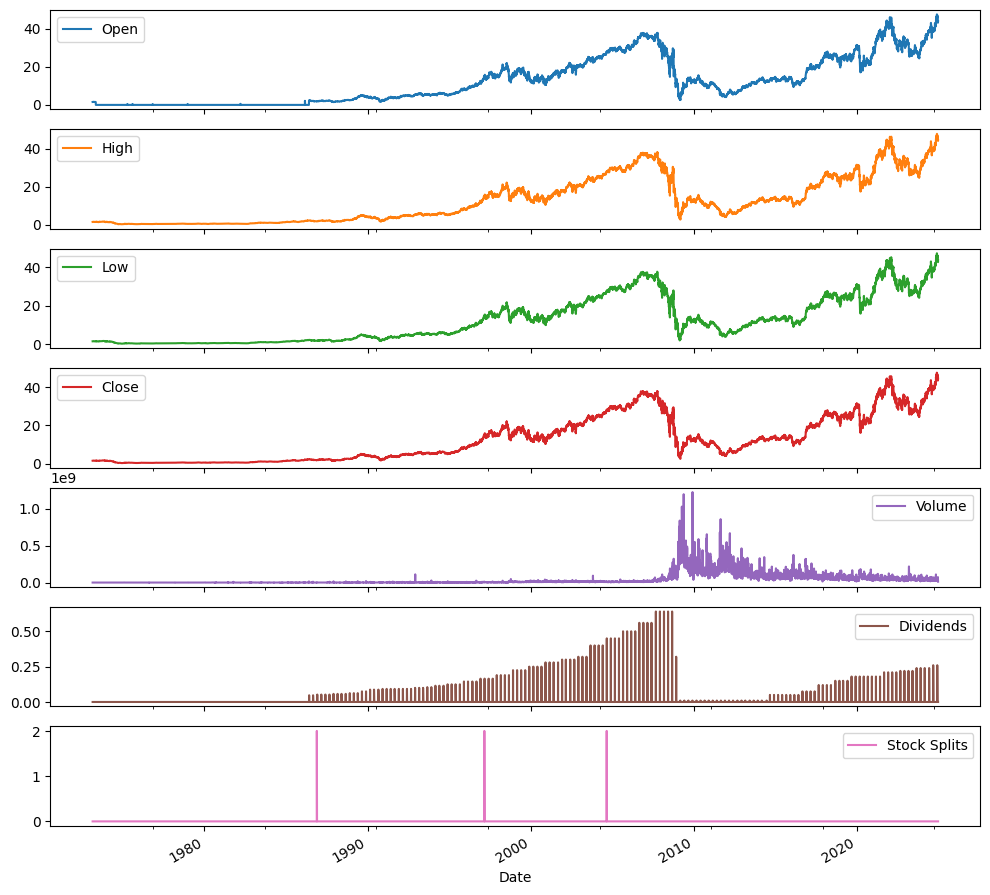

In [202]:
hist.plot(kind="line", figsize=(12, 12), subplots=True)

## Adv. Financial Data Gathering

In [203]:
#Major Indicies
major_indicies = pd.read_html("https://finance.yahoo.com/markets/world-indices")[0]

In [204]:
major_indicies.head()

,Symbol,Name,Unnamed: 2,Price,Change,Change %,Volume,Day Range,52 Wk Range
0,^GSPC,S&P 500,NaN,"6,040.04 +65.97 (+1.10%)",65.97,+1.10%,1.127B,NaN,NaN
1,^DJI,Dow Jones Industrial Average,NaN,"43,297.03 +390.08 (+0.91%)",390.08,+0.91%,230.413M,NaN,NaN
2,^IXIC,NASDAQ Composite,NaN,"20,031.13 +266.24 (+1.35%)",266.24,+1.35%,4.45B,NaN,NaN
3,^NYA,NYSE COMPOSITE (DJ),NaN,"19,341.48 +134.37 (+0.70%)",134.37,+0.70%,0,NaN,NaN
4,^XAX,NYSE AMEX COMPOSITE INDEX,NaN,"4,711.05 +34.27 (+0.73%)",34.27,+0.73%,0,NaN,NaN


In [205]:
ticker_list = major_indicies['Symbol'].str.replace("^", "").str.lower().to_list()

In [206]:
len(ticker_list)

41

In [207]:
df = yf.download(ticker_list, period="1d", start="2020-01-13", end="2021-03-10")

[*********************100%***********************]  41 of 41 completed

36 Failed downloads:
['TWII', 'CASE30', 'AORD', 'BUK100P', 'STOXX50E', 'NZ50', 'BFX', 'MERV', 'GSPTSE', 'AXJO', 'GDAXI', 'TA125.TA', 'KS11', '125904-USD-STRD', 'IPSA', 'N225', 'N100', 'IXIC', 'JKSE', 'JN0U.JO', 'FCHI', 'GSPC', 'BVSP', 'BSESN', 'FTSE']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
['VIX', 'XDB', 'XDN', 'XDE', 'KLSE', 'RUT', 'XDA', 'MXX']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-13 -> 2021-03-10)')
['NYA', 'XAX']: YFInvalidPeriodError("%ticker%: Period '1d' is invalid, must be one of ['1mo', '3mo', '6mo', 'ytd', '1y', '2y', '5y', '10y', 'max']")
['STI']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-13 -> 2021-03-10) (Yahoo error = "Data doesn\'t exist for startDate = 1578891600, endDate = 1615352400")')


In [208]:
df.columns

MultiIndex([('Adj Close',       '000001.SS'),
            ('Adj Close', '125904-USD-STRD'),
            ('Adj Close',            'AORD'),
            ('Adj Close',            'AXJO'),
            ('Adj Close',             'BFX'),
            ('Adj Close',           'BSESN'),
            ('Adj Close',         'BUK100P'),
            ('Adj Close',            'BVSP'),
            ('Adj Close',          'CASE30'),
            ('Adj Close',             'DJI'),
            ...
            (   'Volume',             'STI'),
            (   'Volume',        'STOXX50E'),
            (   'Volume',        'TA125.TA'),
            (   'Volume',            'TWII'),
            (   'Volume',             'VIX'),
            (   'Volume',             'XAX'),
            (   'Volume',             'XDA'),
            (   'Volume',             'XDB'),
            (   'Volume',             'XDE'),
            (   'Volume',             'XDN')],
           names=['Price', 'Ticker'], length=246)

In [209]:
df.head

<bound method NDFrame.head of Price         Adj Close                                                   \
Ticker        000001.SS 125904-USD-STRD AORD AXJO BFX BSESN BUK100P BVSP   
Date                                                                       
2020-01-13  3115.570068             NaN  NaN  NaN NaN   NaN     NaN  NaN   
2020-01-14  3106.820068             NaN  NaN  NaN NaN   NaN     NaN  NaN   
2020-01-15  3090.040039             NaN  NaN  NaN NaN   NaN     NaN  NaN   
2020-01-16  3074.081055             NaN  NaN  NaN NaN   NaN     NaN  NaN   
2020-01-17  3075.496094             NaN  NaN  NaN NaN   NaN     NaN  NaN   
...                 ...             ...  ...  ...  ..   ...     ...  ...   
2021-03-03  3576.899902             NaN  NaN  NaN NaN   NaN     NaN  NaN   
2021-03-04  3503.489990             NaN  NaN  NaN NaN   NaN     NaN  NaN   
2021-03-05  3501.987061             NaN  NaN  NaN NaN   NaN     NaN  NaN   
2021-03-08  3421.409912             NaN  NaN  NaN NaN   Na

In [210]:
adj_close = df.dropna(thresh=10, axis=1)["Adj Close"]

In [211]:
adj_close.head()

Ticker,000001.SS,DJI,DX-Y.NYB,HSI,MOEX.ME
Date,,,,,
2020-01-13,3115.570068,28907.099609,97.349998,NaN,101.647537
2020-01-14,3106.820068,28939.699219,97.370003,NaN,101.576263
2020-01-15,3090.040039,29030.199219,97.230003,NaN,103.233276
2020-01-16,3074.081055,29297.599609,97.320000,NaN,102.003876
2020-01-17,3075.496094,29348.099609,97.610001,NaN,102.271149


In [212]:
adj_close.describe().T

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
000001.SS,278.0,3194.245617,267.324450,2660.169922,2924.339294,3279.262451,3386.254456,3696.167969
DJI,281.0,27486.633181,2832.489684,18591.900391,25812.900391,27902.000000,29591.300781,31961.900391
DX-Y.NYB,291.0,94.974674,3.501006,89.440002,92.279999,93.860001,97.974998,102.820000
HSI,278.0,25730.574085,1945.048268,21696.099609,24349.649902,25116.950195,26677.800293,31084.900391
MOEX.ME,289.0,124.107703,23.443573,72.142136,104.676468,128.133972,142.831345,168.606354


<function matplotlib.pyplot.show(close=None, block=None)>

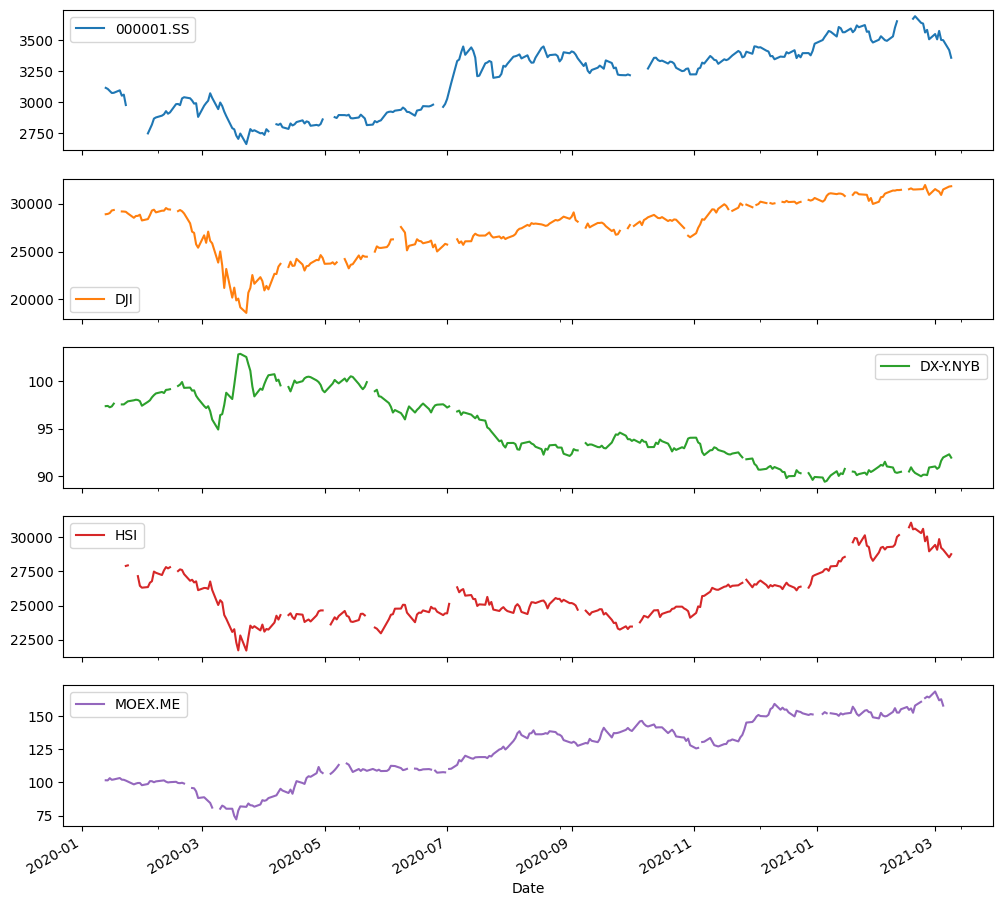

In [213]:
adj_close.plot(figsize=(12,12), subplots=True)
plt.show

Will drop XAX due to lack of viable data.

In [214]:
#adj_close = adj_close.drop("XAX", axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

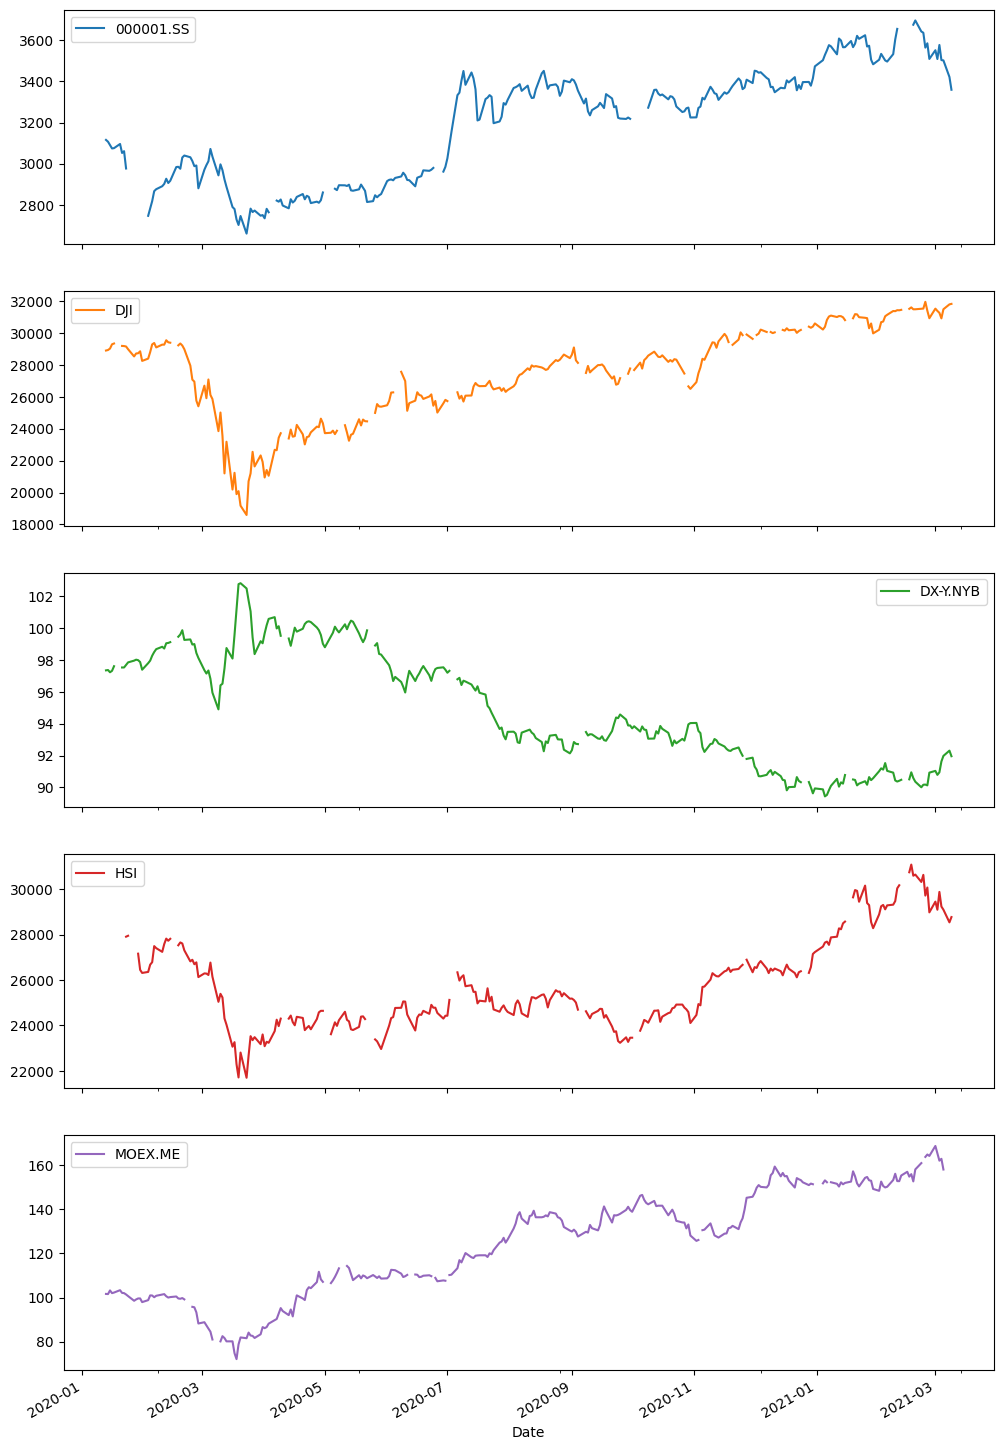

In [215]:
adj_close.plot(figsize=(12,20), subplots=True)
plt.show

In [216]:
dji = adj_close['DJI']

In [217]:
dji.resample("4M").mean()

C:\Users\shres\AppData\Local\Temp\ipykernel_19292\3885203448.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dji.resample("4M").mean()


Date
2020-01-31    28940.228516
2020-05-31    24569.870515
2020-09-30    26987.780779
2021-01-31    29529.720855
2021-05-31    31332.573167
Freq: 4ME, Name: DJI, dtype: float64

In [218]:
dji

Date
2020-01-13    28907.099609
2020-01-14    28939.699219
2020-01-15    29030.199219
2020-01-16    29297.599609
2020-01-17    29348.099609
                  ...     
2021-03-03    31270.099609
2021-03-04    30924.099609
2021-03-05    31496.300781
2021-03-08    31802.400391
2021-03-09    31832.699219
Name: DJI, Length: 301, dtype: float64

In [219]:
dji.shift(1)

Date
2020-01-13             NaN
2020-01-14    28907.099609
2020-01-15    28939.699219
2020-01-16    29030.199219
2020-01-17    29297.599609
                  ...     
2021-03-03    31391.500000
2021-03-04    31270.099609
2021-03-05    30924.099609
2021-03-08    31496.300781
2021-03-09    31802.400391
Name: DJI, Length: 301, dtype: float64

In [220]:
dji_per_change = dji / (dji.shift(1) - 1)

<Axes: xlabel='Date'>

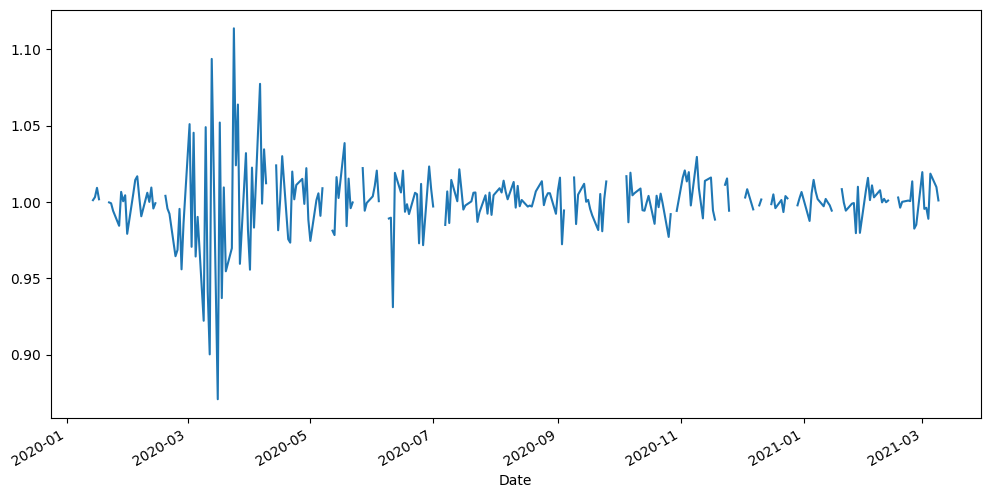

In [221]:
dji_per_change.plot(figsize = (12, 6))

In [222]:
dji_log_returns_shift = np.log(dji / dji.shift(1))

<Axes: xlabel='Date'>

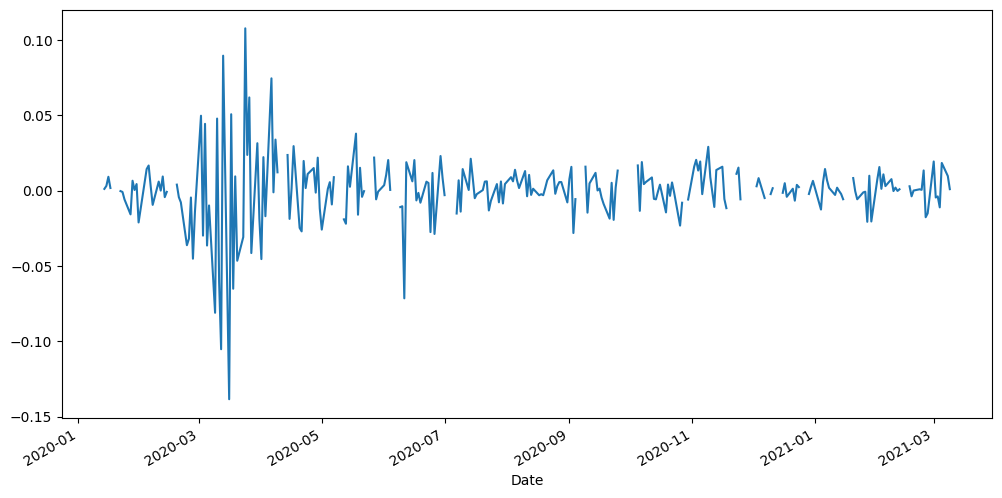

In [223]:
dji_log_returns_shift.plot(figsize=(12, 6))

<Axes: >

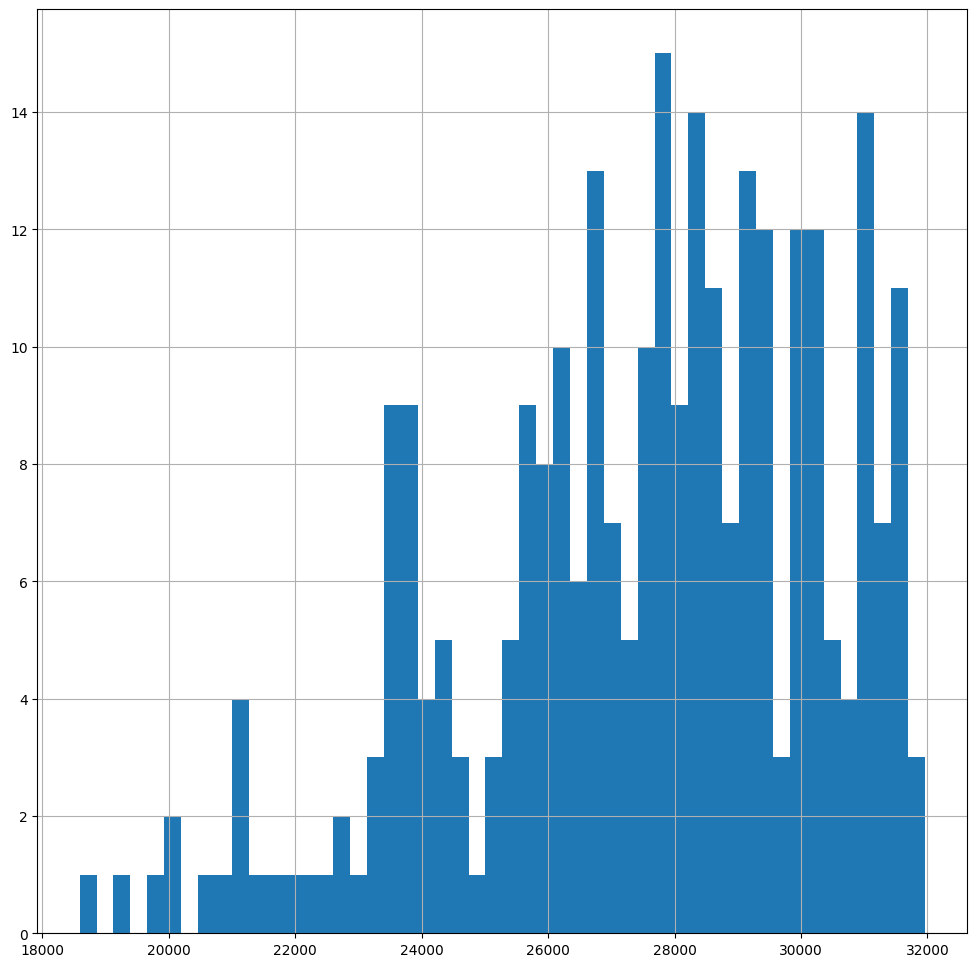

In [224]:
dji.hist(bins=50, figsize=(12, 12))

# Getting the  Finance Data for multi Financial companies.

Pick file : 'all_banks' 

I will use 'yahoo

In [225]:
start = dt.datetime(2020, 1, 13)
end = dt.datetime(2022, 12, 31)

Created a list of the ticker symbols (as strings) in alphabetical order. Call this list: symbols

In [226]:
#BAC = yf.Ticker('BAC')
yf.Ticker

yfinance.ticker.Ticker

In [227]:
symbol = yf.Tickers

In [228]:
stock_data = "symbols"

In [229]:
# List of stock symbols
symbols = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']


# Fetch Data for Each Stock

Use the yfinance library to fetch historical stock data for each symbol. The yf.download() method makes it easy to retrieve data.

In [230]:
# Create an empty dictionary to store the stock data
stock_data = {}

# Fetch stock data for each symbol
for symbol in symbols:
    stock_data[symbol] = yf.download(symbol, start=start, end=end)
    



[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [231]:
stock_data = {}
for symbol in symbols:
    try:
        data = yf.download(symbol, start=start, end=end)
        if not data.empty:  # Check if data is not empty
            stock_data[symbol] = data
        else:
            print(f"No data for {symbol}. Skipping...")
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [232]:
#ticker_list = stock_data['Symbol'].str.replace("^", "").str.lower().to_list()
stock_data = {}
print("stock_data")

stock_data


Combine Data into a Single DataFrame

Analyze closing prices for all the stocks and combine them into one DataFrame:

In [233]:
#ticker_list = major_indicies['Symbol'].str.replace("^", "").str.lower().to_list()
#df = yf.download(ticker_list, period="1d", start="2020-01-13", end="2021-03-10")

In [234]:
closing_prices = pd.DataFrame({symbol: stock_data[symbol]['Close'] for symbol in stock_data})
closing_prices.head()

""


In [235]:
# Extract the closing prices for each stock and combine them into one DataFrame
#closing_prices = pd.DataFrame({symbol: stock_data[symbol]['Close'] for symbol in symbols})
# Display the first few rows of the combined DataFrame
print(closing_prices.head())



Empty DataFrame
Columns: []
Index: []


In [236]:
#symbols = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
#keys = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
#tickers = [BAC,C,GS,JPM,MS,WFC]
#tickers = ['BAC','C','GS','JPM','MS','WFC']



Make dataFrame each

In [237]:
# DataFrames for each ticker (replace with actual data fetching code)
data = {
    'BAC': pd.DataFrame({'Date': ['2024-01-01', '2024-01-02'], 'Price': [35, 36]}),
    'C': pd.DataFrame({'Date': ['2024-01-01', '2024-01-02'], 'Price': [45, 46]}),
    'GS': pd.DataFrame({'Date': ['2024-01-01', '2024-01-02'], 'Price': [355, 356]}),
    'JPM': pd.DataFrame({'Date': ['2024-01-01', '2024-01-02'], 'Price': [125, 126]}),
    'MS': pd.DataFrame({'Date': ['2024-01-01', '2024-01-02'], 'Price': [95, 96]}),
    'WFC': pd.DataFrame({'Date': ['2024-01-01', '2024-01-02'], 'Price': [45, 46]}),
}

# Add the Date as an index for proper alignment
for ticker in data:
    data[ticker].set_index('Date', inplace=True)

# Concatenate the data
bank_stocks = pd.concat(data, axis=1, keys=data.keys()).sort_index()

# Display the result
print(bank_stocks)


             BAC     C    GS   JPM    MS   WFC
           Price Price Price Price Price Price
Date                                          
2024-01-01    35    45   355   125    95    45
2024-01-02    36    46   356   126    96    46


Download data from yfinance
using date range

In [238]:
# Define start and end dates as strings
start = "2020-01-13"
end = "2022-12-31"

# Ticker symbols
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

# Fetch data for each ticker and store in a dictionary
data = {ticker: yf.download(ticker, start=start, end=end) for ticker in tickers}

# Keep only the 'Close' price for simplicity
for ticker in data:
    data[ticker] = data[ticker][['Close']].rename(columns={'Close': ticker})

# Concatenate data into a single DataFrame
bank_stocks = pd.concat(data.values(), axis=1)

# Sort by date (index)
bank_stocks.sort_index(inplace=True)

# Display the resulting DataFrame
print(bank_stocks)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price             BAC          C          GS         JPM         MS        WFC
Ticker            BAC          C          GS         JPM         MS        WFC
Date                                                                          
2020-01-13  35.060001  80.650002  245.210007  137.199997  52.779999  52.110001
2020-01-14  35.320000  81.910004  245.660004  138.800003  52.860001  49.299999
2020-01-15  34.669998  81.239998  245.210007  136.720001  52.939999  48.320000
2020-01-16  34.720001  81.000000  249.720001  137.250000  56.439999  49.250000
2020-01-17  34.709999  81.120003  249.460007  138.199997  57.509998  49.180000
...               ...        ...         ...         ...        ...        ...
2022-12-23  32.470001  44.259998  345.510010  131.279999  86.110001  40.980000
2022-12-27  32.529999  44.389999  341.970001  131.740005  85.059998  41.040001
2022-12-28  32.770000  44.619999  340.869995  132.460007  84.459999  41.119999
2022-12-29  33.139999  45.160000  343.429993  133.22